
---

<h1 style="text-align: center;font-size: 40px;">Netflix Data Analysis & Visualization</h1>

---

<center><img src="https://media.giphy.com/media/xRItaX70EufZK/giphy.gif"></center>

---

>><h4>Netflix, Inc. is an American media-services provider and production company headquartered in Los Gatos, California, founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television programs, including those produced in-house. As of April 2020, Netflix had over 193 million paid subscriptions worldwide, including 73 million in the United States. It is available worldwide except in the following: mainland China (due to local restrictions), Iran, Syria, North Korea, and Crimea (due to U.S. sanctions). The company also has offices in French, United States, United Kingdom, Brazil, the Netherlands, India, Japan, and South Korea. Netflix is a member of the Motion Picture Association of America (MPAA). Today, the company produces and distributes content from countries all over the globe.</h4>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/netflix_titles.csv


In [2]:
import pandas_profiling
import missingno as msno
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns


In [3]:
df = pd.read_csv("input/netflix_titles.csv")
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
profile = pandas_profiling.ProfileReport(df)
profile

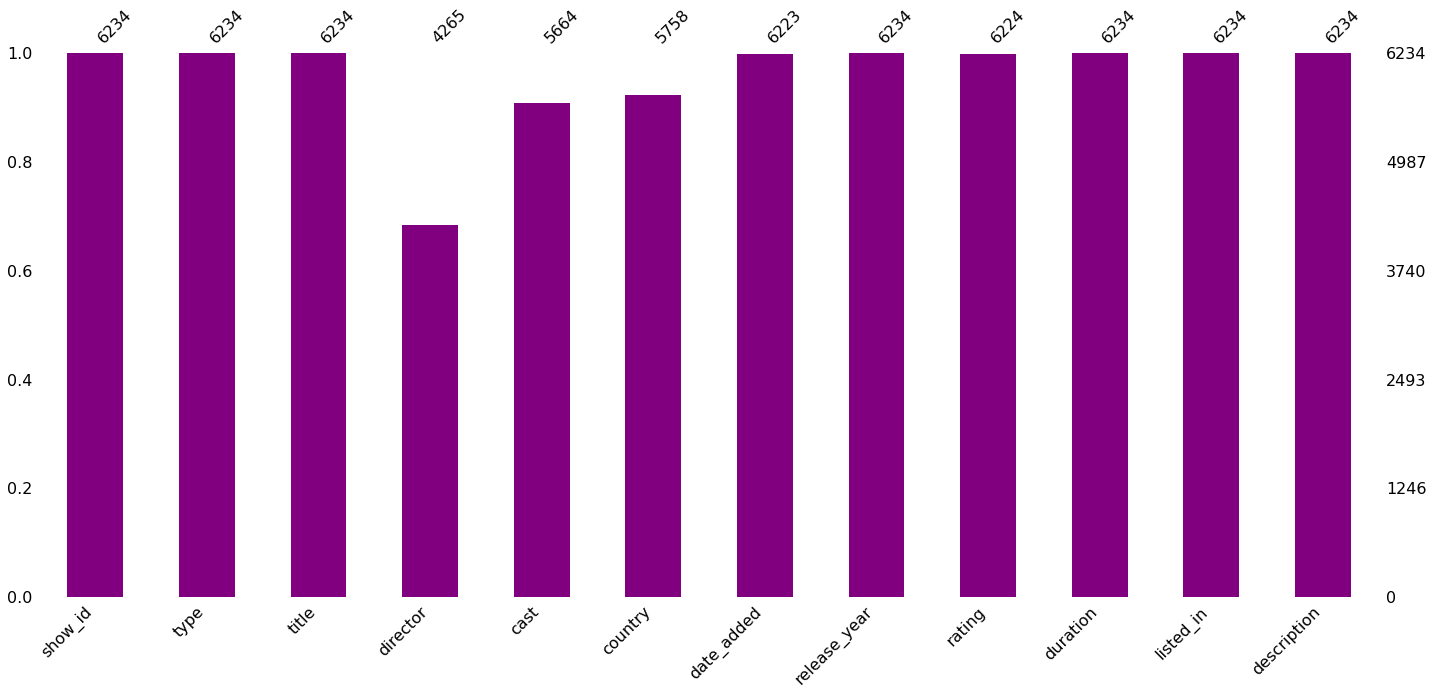

In [6]:
n = msno.bar(df,color='purple')

><div class="alert alert-block alert-info">
<b></b> We have null values in column Director,Cast,Country,Rating,Date_added,So before doing visualization let's at first deal with these values
</div>

><div class="alert alert-block alert-info">
<b></b> We don't need Director,Cast from the Dataset to visualize  & sincce these two column has missing values ,so we can drop them.
</div>

In [7]:
df.drop(["director","cast"],axis =1,inplace=True)
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [8]:
df['country'].value_counts()

United States                                    2032
India                                             777
United Kingdom                                    348
Japan                                             176
Canada                                            141
                                                 ... 
United Kingdom, Italy, France, United States        1
Italy, United States, Argentina                     1
Denmark, France, Poland                             1
Spain, United Kingdom, United States                1
Canada, France, Italy, Morocco, United States       1
Name: country, Length: 554, dtype: int64

><h4>Country column is important for our Visualization & since it has some null values we can replace them by United States,Since United States has the largest nummber of shows,and Netflix was also created in United States</h4>

In [9]:
df['country'].replace(np.nan,"United States",inplace=True)

In [10]:
df['date_added'].value_counts()

January 1, 2020      122
November 1, 2019      94
March 1, 2018         78
December 31, 2019     74
October 1, 2018       72
                    ... 
February 4, 2016       1
February 27, 2017      1
April 25, 2016         1
February 4, 2008       1
 November 3, 2015      1
Name: date_added, Length: 1524, dtype: int64

><h4>since we have release_year so we don't need year value from date_added column,But Month is important for Visualizing our data,so let's separate the month from the date_added column & replace the Null values with 0</h4>

In [11]:
netflix_date = df[['date_added']].replace(np.nan,'Not Added')
netflix_date["release_month"] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(" ")[0])
netflix_date.head()

date_added release_month
0  September 9, 2019     September
1  September 9, 2016     September
2  September 8, 2018     September
3  September 8, 2018     September
4  September 8, 2017     September

In [12]:
netflix_date["release_month"].value_counts()

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
Not           11
Name: release_month, dtype: int64

In [13]:
netflix_date['release_month'].replace('Not', 0,inplace=True)


In [14]:
netflix_date["release_month"].value_counts()

December     696
October      646
November     612
January      610
March        551
August       509
September    479
July         474
April        447
May          428
June         393
February     378
0             11
Name: release_month, dtype: int64

In [15]:
netflix_date.drop("date_added",axis=1,inplace=True)
netflix_date.head()

release_month
0     September
1     September
2     September
3     September
4     September

In [16]:
netflix = pd.concat([df,netflix_date],axis=1)
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description release_month  
0  Before planning an awesome wedding for his gra...     September  
1  Jandino Asporaat riffs on the challenges of ra...     September  
2  With the help of three human allies, the Autob...     September  
3  When a prison ship crash unleashes hundreds of...     September  
4  When nerdy high schooler Dani finally attracts...     September

In [17]:
netflix.drop("date_added",axis=1,inplace=True)
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country  release_year    rating  duration  \
0  United States, India, South Korea, China          2019     TV-PG    90 min   
1                            United Kingdom          2016     TV-MA    94 min   
2                             United States          2013  TV-Y7-FV  1 Season   
3                             United States          2016     TV-Y7  1 Season   
4                             United States          2017     TV-14    99 min   

                            listed_in  \
0  Children & Family Movies, Comedies   
1                     Stand-Up Comedy   
2                            Kids' TV   
3                            Kids' TV   
4                            Comedies   

                                         description release_month  
0  Before planning an awesome wedding for his gra...     September  
1  Jandino Asporaat riffs on the challenges of ra...     September  
2  With the help of three human allies, the Autob...     September  
3  When a prison ship crash unleashes hundreds of...     September  
4  When nerdy high schooler Dani finally attracts...     September

In [18]:
netflix["rating"].value_counts()

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [19]:
netflix["rating"].isnull().sum()

10

><h4>Since rating column has only 10 null values,so let's replace the null values with TV-MA since they gives the most amount of Rating</h4>

In [20]:
netflix["rating"].replace(np.nan,"TV-MA",inplace=True)
netflix.isnull().sum()

show_id          0
type             0
title            0
country          0
release_year     0
rating           0
duration         0
listed_in        0
description      0
release_month    0
dtype: int64

><h4>So we successfully removed all the Null Values,Now we can visualize our Data</h4>

In [21]:
netflix.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                                    country  release_year    rating  duration  \
0  United States, India, South Korea, China          2019     TV-PG    90 min   
1                            United Kingdom          2016     TV-MA    94 min   
2                             United States          2013  TV-Y7-FV  1 Season   
3                             United States          2016     TV-Y7  1 Season   
4                             United States          2017     TV-14    99 min   

                            listed_in  \
0  Children & Family Movies, Comedies   
1                     Stand-Up Comedy   
2                            Kids' TV   
3                            Kids' TV   
4                            Comedies   

                                         description release_month  
0  Before planning an awesome wedding for his gra...     September  
1  Jandino Asporaat riffs on the challenges of ra...     September  
2  With the help of three human allies, the Autob...     September  
3  When a prison ship crash unleashes hundreds of...     September  
4  When nerdy high schooler Dani finally attracts...     September

><h4>Let's find out the number of Movie & Tv Show</h4>

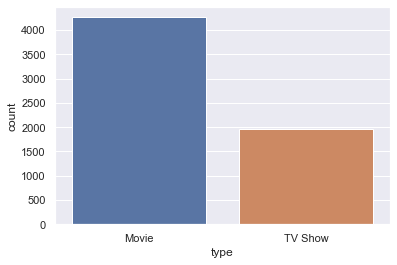

In [22]:
sns.set()
sns.countplot(x="type",data=netflix)
plt.show()

><h4>So Netflix has around 4500 Movies & almost 2000 Tv Show </h4>

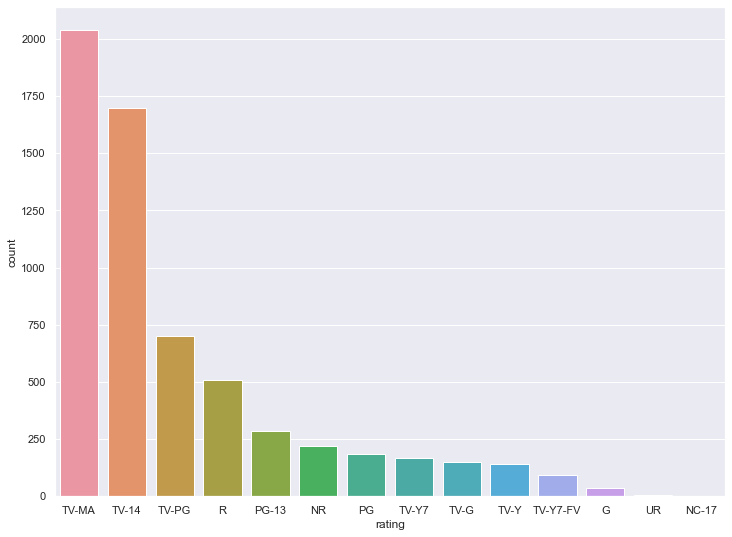

In [23]:
plt.figure(figsize=(12,9))
sns.countplot(x="rating",data=netflix,order= netflix['rating'].value_counts().index[0:14])

><h4>So most of the ratings is given by TV-MA then TV-14</h4>

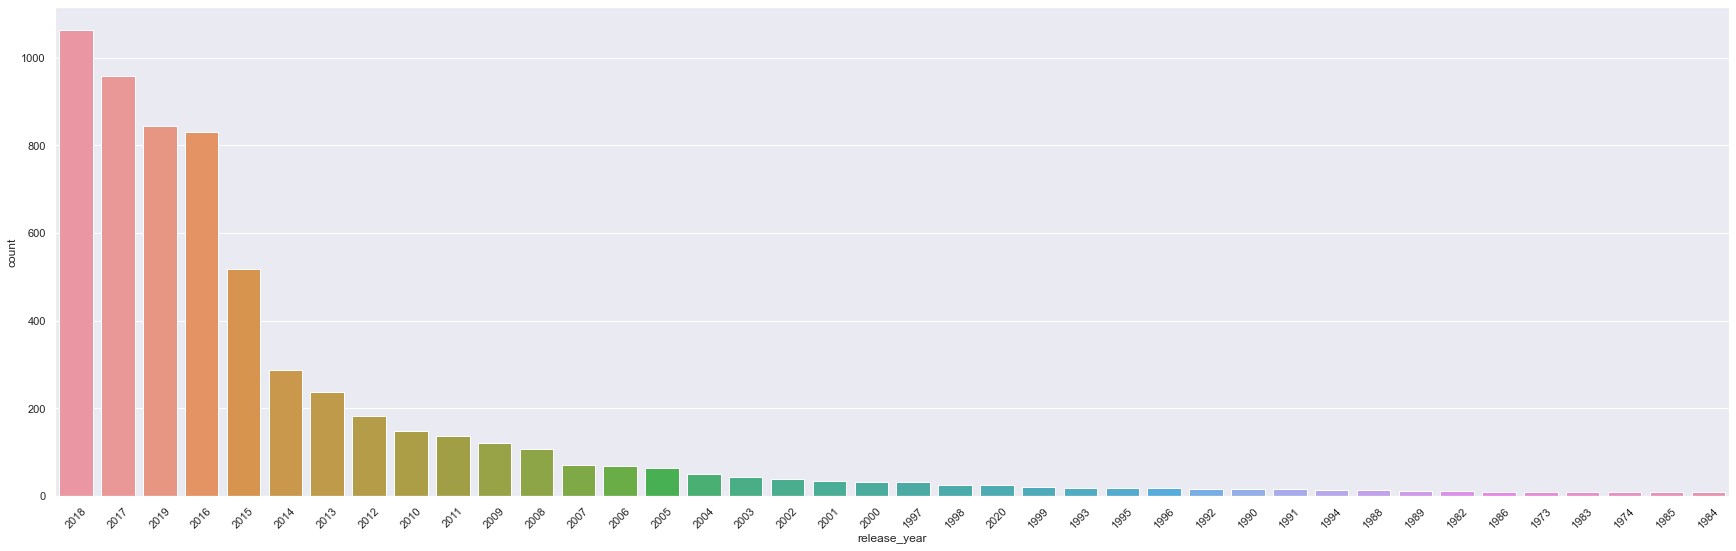

In [24]:
sns.set()
plt.figure(figsize=(30,9))
sns.countplot(x="release_year",data= netflix,order = netflix['release_year'].value_counts().index[0:40])
plt.xticks(rotation=45)
plt.show()

><h4>So total Highest number of Movies & Tv Shows has been released in the Year 2018</h4>

><h3>Let's see which month directors prefer most to release their Movies & Tv Shows</h3>

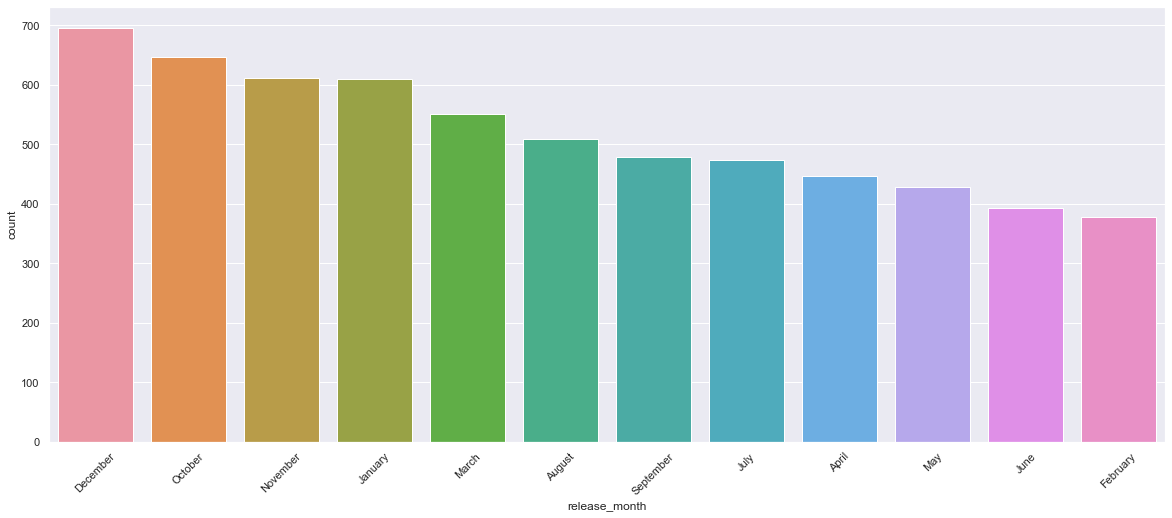

In [25]:
sns.set()
plt.figure(figsize=(20,8))
sns.countplot(x="release_month",data= netflix,order = netflix['release_month'].value_counts().index[0:12])
plt.xticks(rotation=45)
plt.show()

><h4>Most of the directors prefer to release their Movies & Tv Shows in December.Since December is the Month of Vacations</h4>

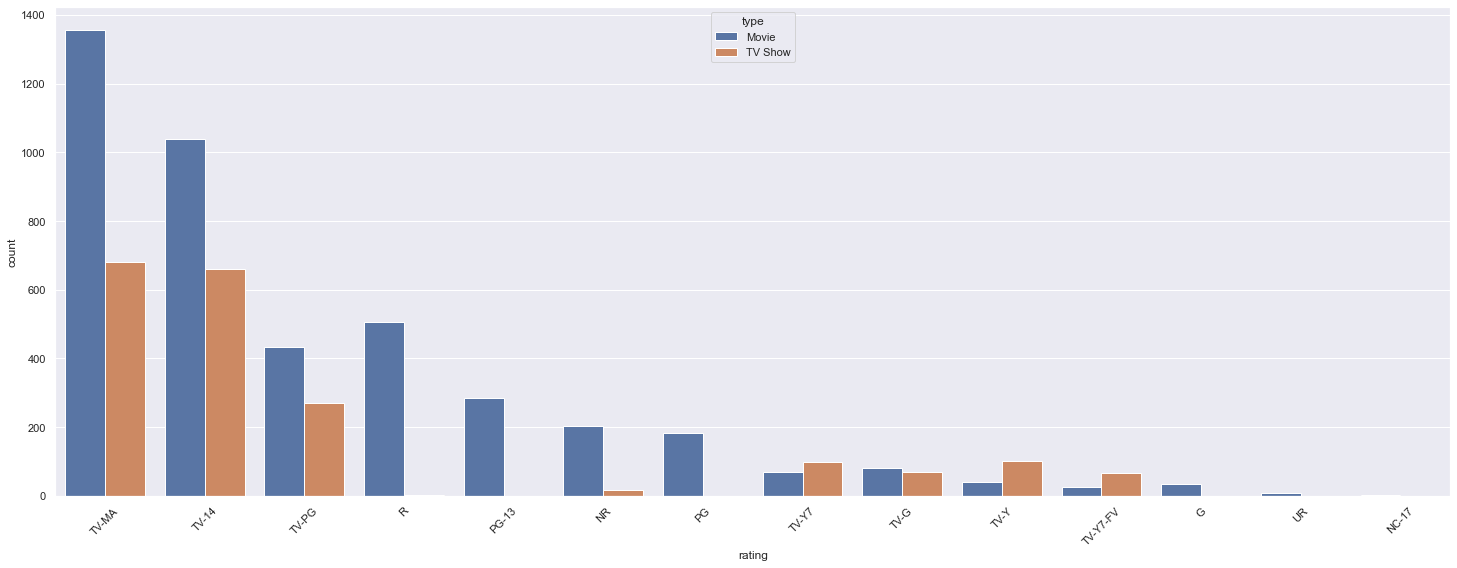

In [26]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="rating",data= netflix,hue= "type",order = netflix['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

><h4>Both for Movies & Tv Shows TV-MA always gives the Highest number of ratings,but TV-14 almost gives the same amount of ratings for Tv-Shows as TV-MA</h4>

In [27]:
netflix["country"].value_counts().head()

United States     2508
India              777
United Kingdom     348
Japan              176
Canada             141
Name: country, dtype: int64

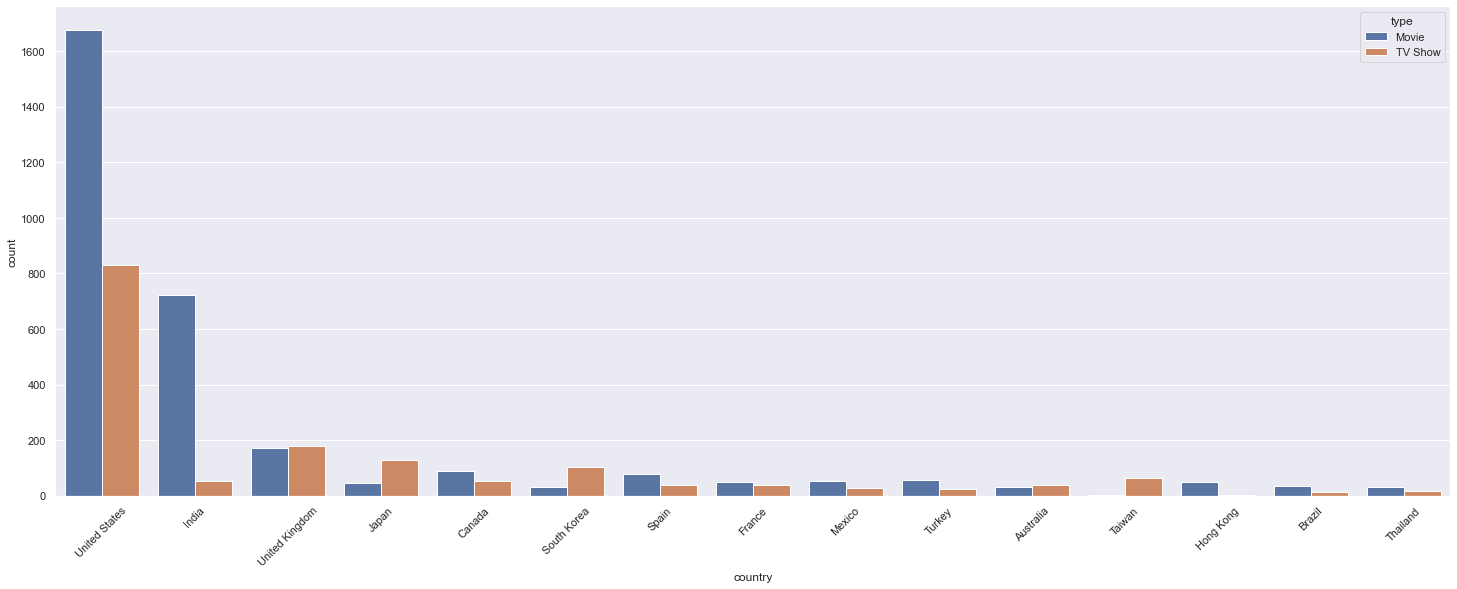

In [28]:
sns.set()
plt.figure(figsize=(25,9))
sns.countplot(x="country",data= netflix,hue= "type",order = netflix['country'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.show()

> <h4>So United States provides the Highest number of Movies & Tv Shows,then at 2nd place India provides the Highest number of Movies</h4>

In [29]:
top = netflix['country'].value_counts()[0:8]
top.index

Index(['United States', 'India', 'United Kingdom', 'Japan', 'Canada',
       'South Korea', 'Spain', 'France'],
      dtype='object')

In [30]:
fig = px.pie(netflix,values = top,names = top.index,labels= top.index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

><h4>United States has the Highest number of Movies & Tv Shows</h4>

> <h3> WordCloud</h3>

<h4>Word Cloud of Country's</h4>

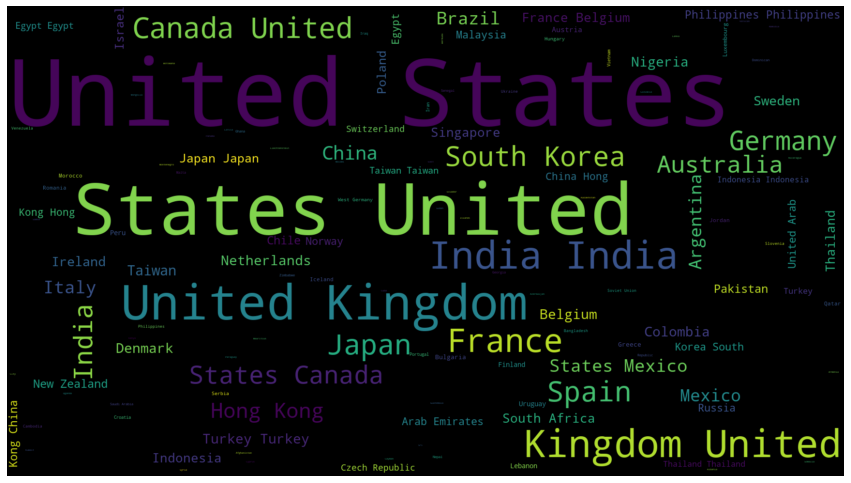

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = "black",width=1730,height=970).generate(" ".join(netflix.country))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.figure(1,figsize=(12,12))
plt.show()

><h4>WordCloud of Titles</h4>

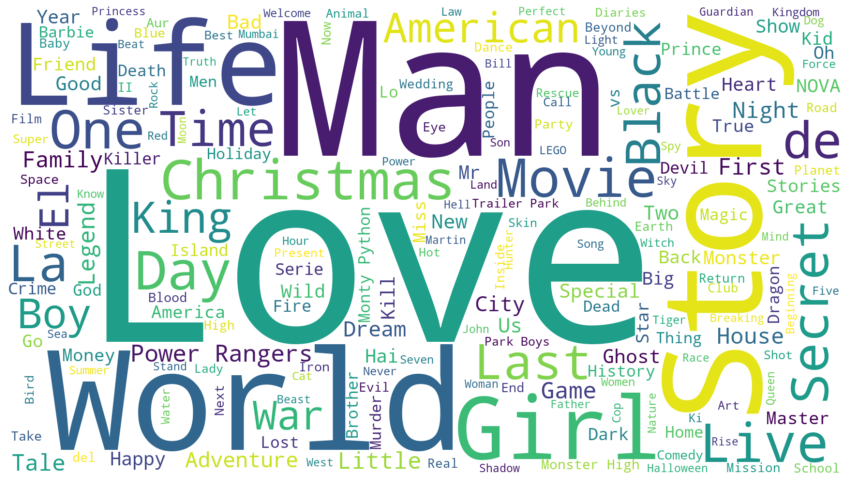

In [32]:
wordcloud = WordCloud(background_color = "white",width=1730,height=970).generate(" ".join(netflix.title))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.figure(1,figsize=(12,12))
plt.show()

><h3>Let's find out which Genre of Movies & Tv Shows Netflix Provides the Most</h3>

In [33]:
top_listed_in=netflix["listed_in"].value_counts()[0:25]
top_listed_in.head()

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Name: listed_in, dtype: int64

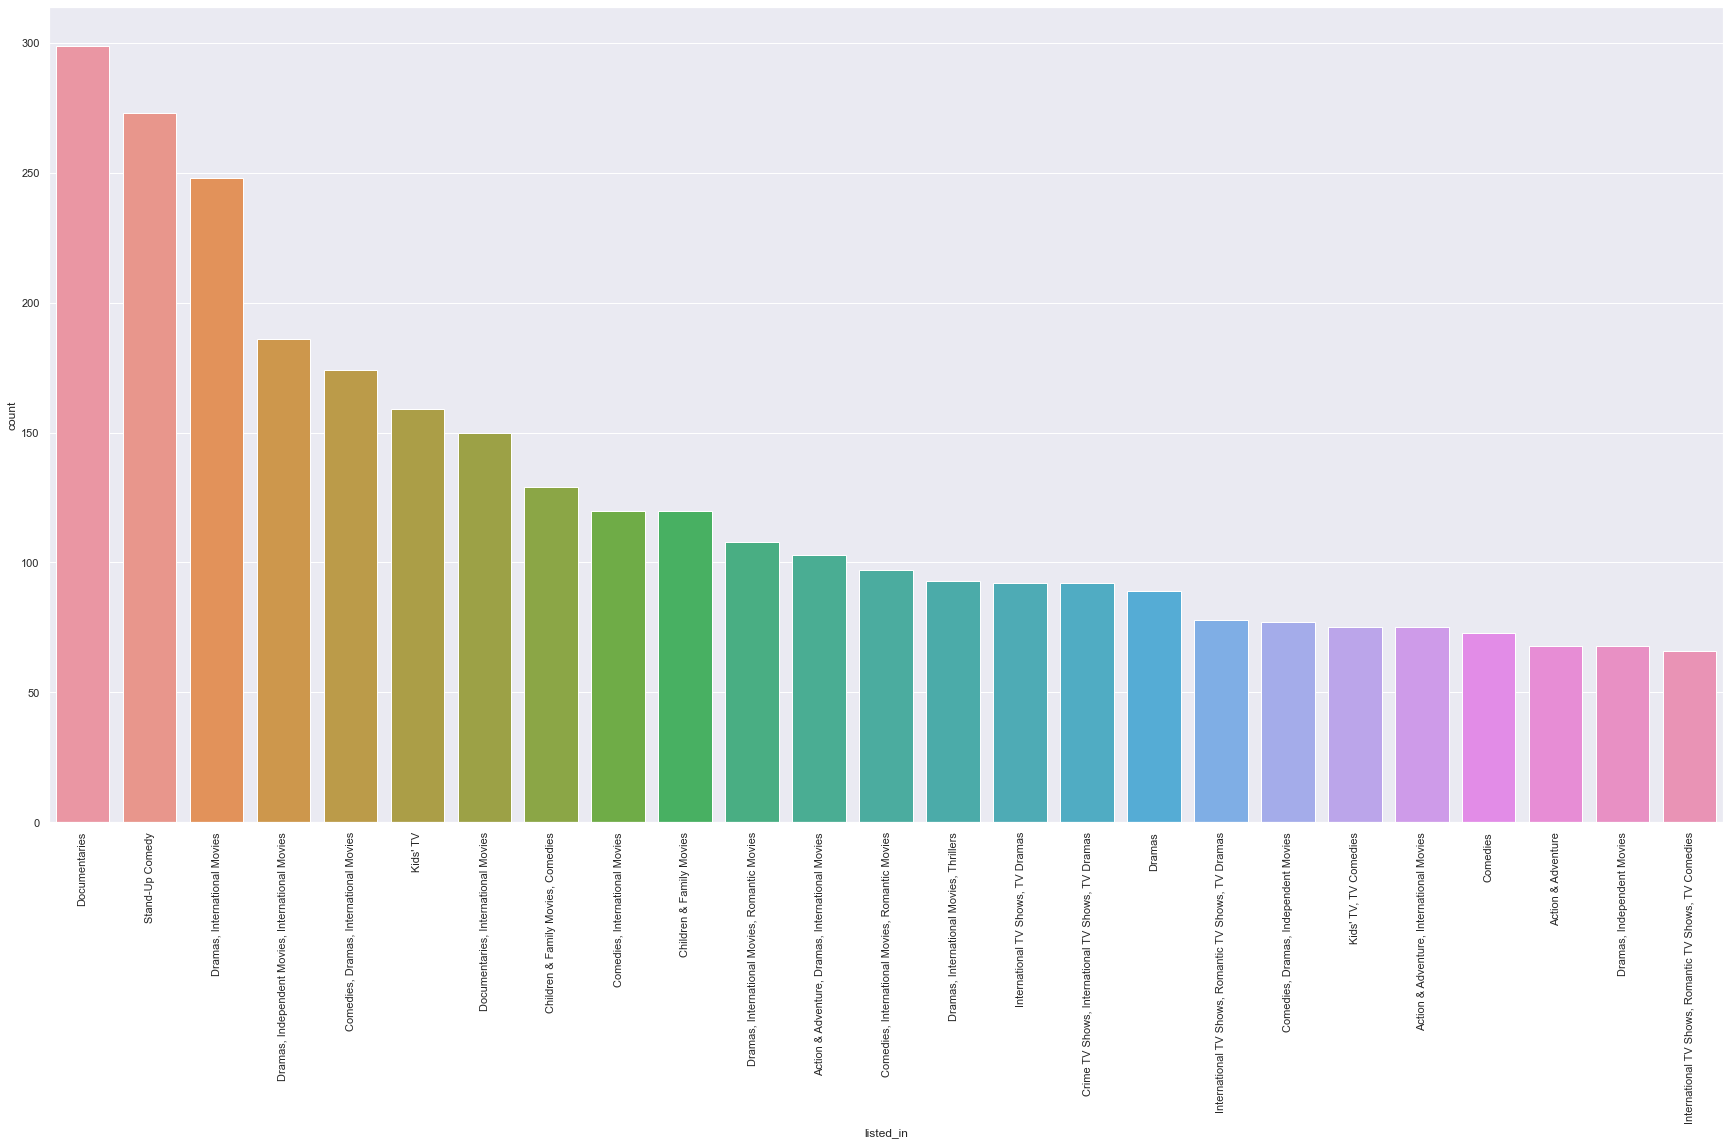

In [34]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(x='listed_in',data = netflix,order =netflix["listed_in"].value_counts().index[0:25])
plt.xticks(rotation = 90)
plt.show()

In [35]:
fig = px.pie(netflix,values = top_listed_in,names = top_listed_in.index,labels= top_listed_in.index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.show()

> <h4>Netflix provides "Documentry" type Movies & TvShows most then in the 2nd place it provides Stand Up Comedy most</h4>

> <h3>Let's  find out which genre Movies/Tv shows get's the most amount of rating , by which rating</h3>

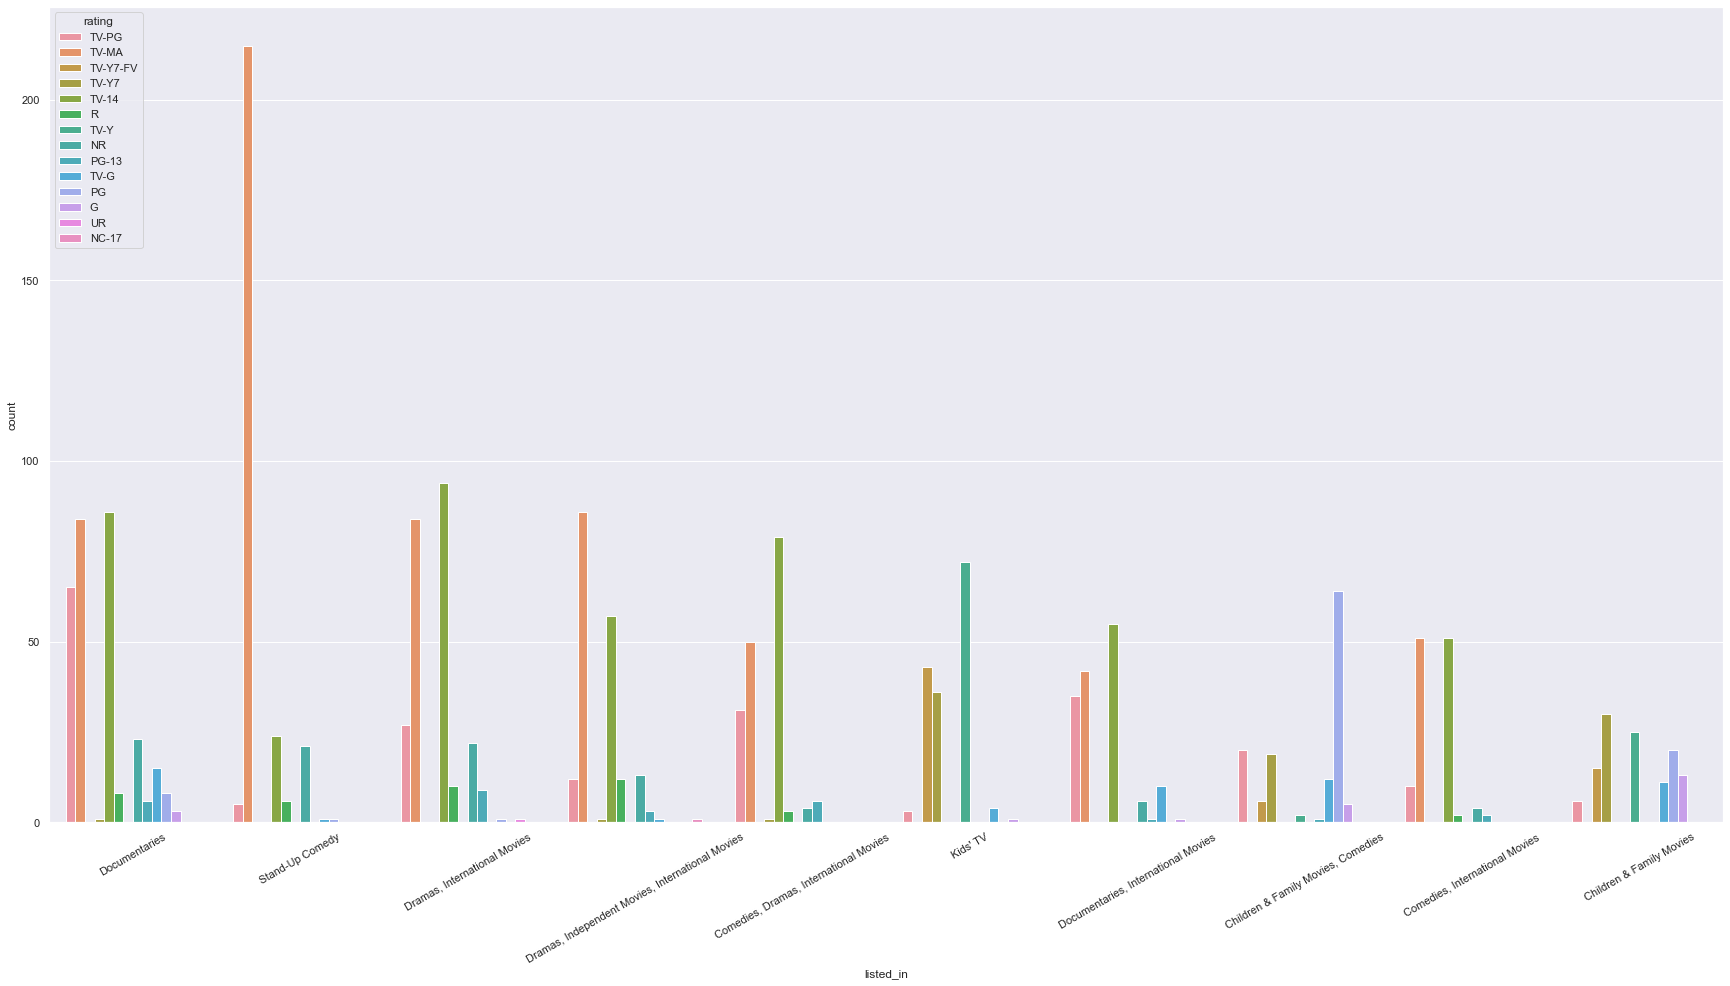

In [36]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(x='listed_in',hue='rating',data = netflix,order =netflix["listed_in"].value_counts().index[0:10])
plt.xticks(rotation = 30)
plt.show()

> <h4>Drama type movies are mostly rated by TV-14 & Most of the Stand Up Comedy are rated by TV-MA </h4>

> <h4>Let's see Listed of old Movies on Netflix </h4>

In [37]:
old = netflix.sort_values("release_year",ascending=True)
old[["title","type","country","release_year"]].head(20)

title     type  \
4292                 Pioneers: First Women Filmmakers*  TV Show   
2011                                    Prelude to War    Movie   
2013                              The Battle of Midway    Movie   
2022     Undercover: How to Operate Behind Enemy Lines    Movie   
2023                Why We Fight: The Battle of Russia    Movie   
2026                   WWII: Report from the Aleutians    Movie   
2017  The Memphis Belle: A Story of a\nFlying Fortress    Movie   
2019                                 The Negro Soldier    Movie   
2021                                  Tunisian Victory    Movie   
2012                                        San Pietro    Movie   
2009                          Nazi Concentration Camps    Movie   
2005                           Know Your Enemy - Japan    Movie   
2930                                      The Stranger    Movie   
4079               Pioneers of African-American Cinema  TV Show   
2006                                Let There Be Light    Movie   
2020                                       Thunderbolt    Movie   
2981                                   White Christmas    Movie   
1401                             Rebel Without a Cause    Movie   
1369                                  Forbidden Planet    Movie   
1371                                              Gigi    Movie   

                            country  release_year  
4292                  United States          1925  
2011                  United States          1942  
2013                  United States          1942  
2022                  United States          1943  
2023                  United States          1943  
2026                  United States          1943  
2017                  United States          1944  
2019                  United States          1944  
2021  United States, United Kingdom          1944  
2012                  United States          1945  
2009                  United States          1945  
2005                  United States          1945  
2930                  United States          1946  
4079                  United States          1946  
2006                  United States          1946  
2020                  United States          1947  
2981                  United States          1954  
1401                  United States          1955  
1369                  United States          1956  
1371                  United States          1958

> <h4>All of the oldest Movies & TV Shows on Netflix  are from United States</h4>

> <h3>List of Kids TV Shows on Netflix</h3>

In [38]:
kids_show=netflix[netflix["listed_in"] == "Kids' TV"].reset_index()
kids_show[["title","country","release_year"]].head(10)

title  \
0                                Transformers Prime   
1                  Transformers: Robots in Disguise   
2                                            Ben 10   
3                                             Hilda   
4                        Kulipari: An Army of Frogs   
5                         Transformers: Rescue Bots   
6                      Super Monsters Monster Party   
7  Loo Loo Kids: Johny & Friends Musical Adventures   
8                  Transformers Rescue Bots Academy   
9                          Transformers: Cyberverse   

                                 country  release_year  
0                          United States          2013  
1                          United States          2016  
2                          United States          2016  
3  United Kingdom, Canada, United States          2018  
4                          United States          2016  
5                  Canada, United States          2016  
6                          United States          2018  
7                          United States          2016  
8                          United States          2019  
9                          United States          2018

> <div class="alert alert-block alert-info">
<b></b> Let's see Bangladesh has any Movies on Netflix or Not
</div>


In [39]:
netflix[netflix["country"] == "Bangladesh"]

show_id   type                   title     country  release_year  \
3198  81048548  Movie           Komola Rocket  Bangladesh          2018   
4464  81048551  Movie  Sincerely Yours, Dhaka  Bangladesh          2018   

     rating duration                                         listed_in  \
3198  TV-14   95 min  Dramas, Independent Movies, International Movies   
4464  TV-MA  136 min              Comedies, Dramas, Independent Movies   

                                            description release_month  
3198  As the lives of rich and poor passengers aboar...       January  
4464  Eleven emerging Bangladeshi filmmakers present...      December

In [40]:
Country = pd.DataFrame(netflix["country"].value_counts().reset_index().values,columns=["country","TotalShows"])
Country.head()

country TotalShows
0   United States       2508
1           India        777
2  United Kingdom        348
3           Japan        176
4          Canada        141

> <h3> Country's Having the Netflix Movie/ Tv Shows</h3>

In [41]:
fig = px.choropleth(   
    locationmode='country names',
    locations=Country.country,
    featureidkey="Country.country",
    labels=Country["TotalShows"]
)
fig.show()